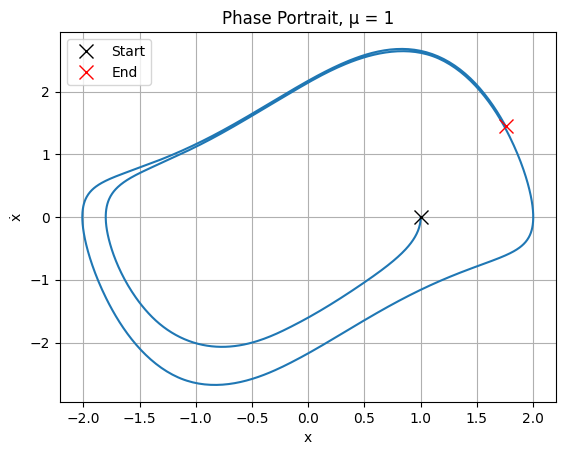

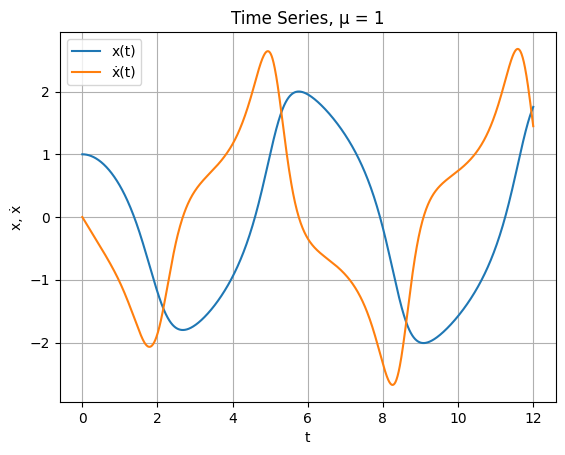

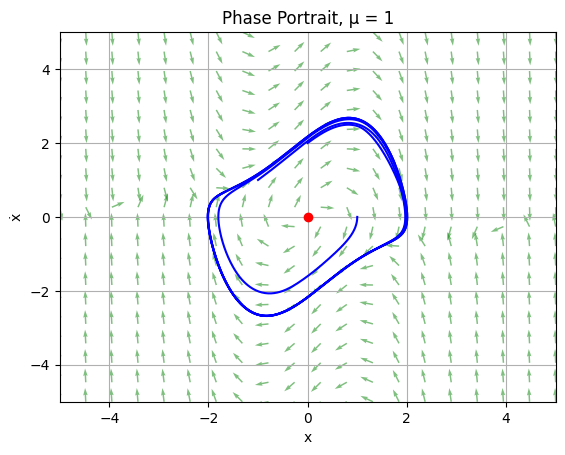

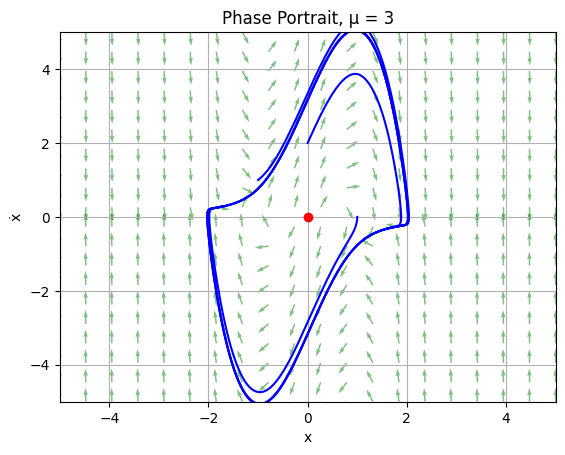

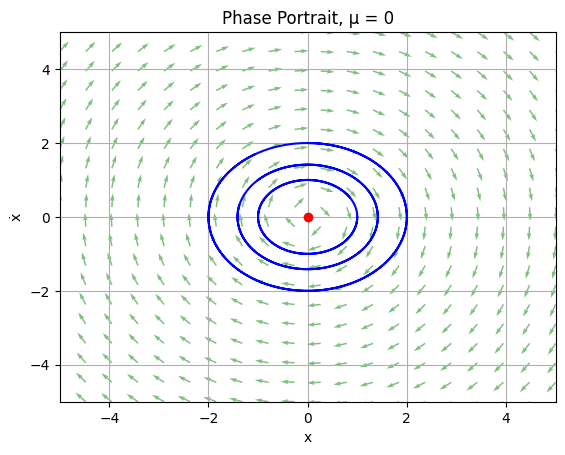

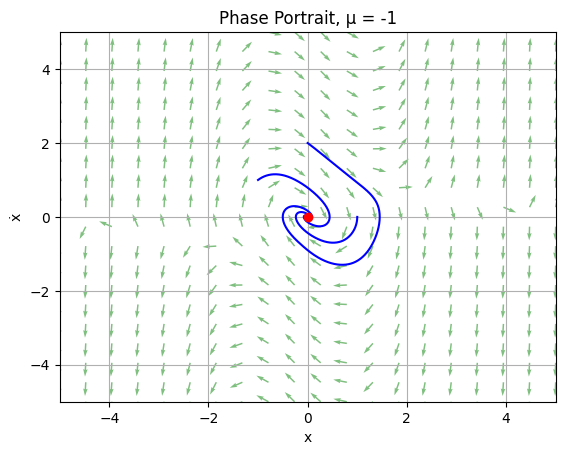

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def vanderpol(t, u, mu):
    x, y = u
    dxdt = y
    dydt = -mu * (x**2 - 1) * y - x
    return np.array([dxdt, dydt])

t0, tf = 0, 12 
t_span = (t0, tf)
t_eval = np.linspace(t0, tf, int((tf - t0) / 0.01) + 1)  

# (a) Numerical Solution for mu = 1
mu = 1
u0 = [1, 0]  

sol = solve_ivp(vanderpol, t_span, u0, args=(mu,), t_eval=t_eval, method='RK45')

t = sol.t
x, y = sol.y[0], sol.y[1]

# Phase Portrait
plt.plot(x, y)
plt.plot(x[0], y[0], 'kx', markersize=10, label="Start")
plt.plot(x[-1], y[-1], 'rx', markersize=10, label="End")
plt.xlabel('x')
plt.ylabel('ẋ')
plt.title('Phase Portrait, μ = 1')
plt.legend()
plt.grid(True)
plt.show()

# Time Series
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='ẋ(t)')
plt.xlabel('t')
plt.ylabel('x, ẋ')
plt.title('Time Series, μ = 1')
plt.legend()
plt.grid(True)
plt.show()

# (b): Phase Portraits for mu = 1 and mu = 3
def plot_phase_portrait(mu, title):
    # Vector field
    x_range = np.linspace(-5, 5, 20)
    y_range = np.linspace(-5, 5, 20)
    X, Y = np.meshgrid(x_range, y_range)
    U, V = Y, -mu * (X**2 - 1) * Y - X

    mag = np.sqrt(U**2 + V**2)
    U_norm = U / mag
    V_norm = V / mag
    
    plt.quiver(X, Y, U_norm, V_norm, color='green', alpha=0.5)

    initial_conditions = [[1, 0], [-1, 1], [0, 2]]
    for ic in initial_conditions:
        sol = solve_ivp(vanderpol, t_span, ic, args=(mu,), t_eval=t_eval, method='RK45')
        plt.plot(sol.y[0], sol.y[1], 'b')

    # Fixed point
    plt.plot(0, 0, 'ro')
    
    plt.xlabel('x')
    plt.ylabel('ẋ')
    plt.title(title)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid(True)
    plt.show()
    
plot_phase_portrait(1, 'Phase Portrait, μ = 1')
plot_phase_portrait(3, 'Phase Portrait, μ = 3')

#(c): Limit Cycle for mu = 0?
plot_phase_portrait(0, 'Phase Portrait, μ = 0')

#(d): Stability Analysis for mu = -1
plot_phase_portrait(-1, 'Phase Portrait, μ = -1')

Fixed point in the first quadrant:
  x* = 2.0000,  y* = 5.0000


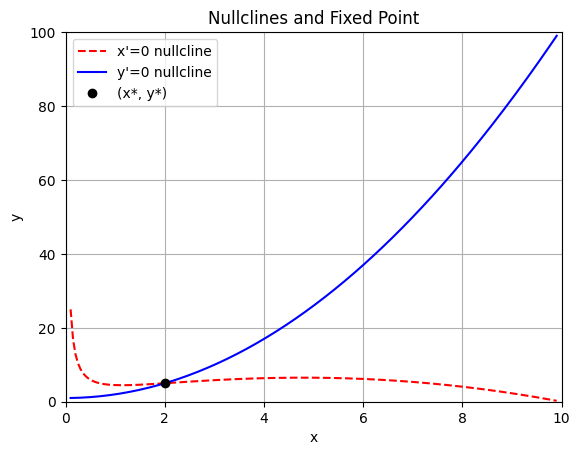

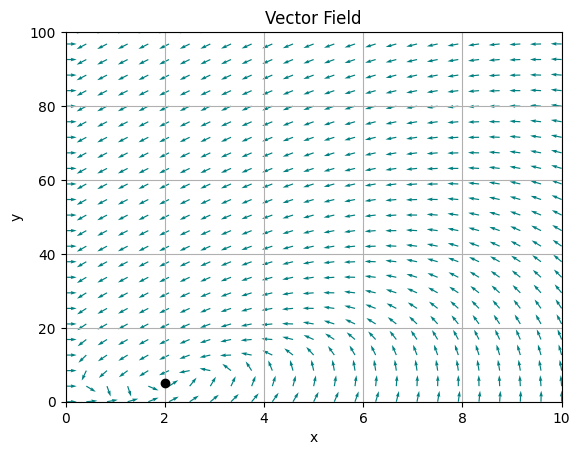

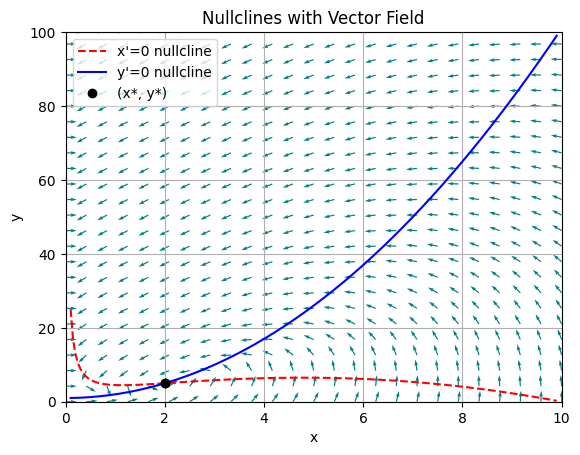

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
a = 10.0
b = 2.0

def f_xdot(x, y):
    return a - x - 4*x*y/(1+x**2)

def f_ydot(x, y):
    return b*x*(1 - y/(1+x**2))

def nullcline_x(x):
    return (1 + x**2)*(a - x)/(4*x)

def nullcline_y(x):
    return 1 + x**2

def intersection_equation(x):
    return nullcline_y(x) - nullcline_x(x)

x_analytic = 2.0 
x_star = fsolve(intersection_equation, x_analytic)[0] 
y_star = nullcline_y(x_star)

print("Fixed point in the first quadrant:")
print(f"  x* = {x_star:.4f},  y* = {y_star:.4f}")


x_vals = np.linspace(0.1, 9.9, 200)
y_ncx = nullcline_x(x_vals)
y_ncy = nullcline_y(x_vals)


plt.plot(x_vals, y_ncx, 'r--', label="x'=0 nullcline")
plt.plot(x_vals, y_ncy, 'b-',  label="y'=0 nullcline")


plt.plot(x_star, y_star, 'ko', label="(x*, y*)")
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nullclines and Fixed Point')
plt.legend()
plt.grid(True)
plt.show()

Xmesh, Ymesh = np.meshgrid(np.linspace(0, 10, 25),
                           np.linspace(0, 101, 25))
U = f_xdot(Xmesh, Ymesh)
V = f_ydot(Xmesh, Ymesh)
mag = np.sqrt(U**2 + V**2)
U_norm = U / mag
V_norm = V / mag


plt.quiver(Xmesh, Ymesh, U_norm, V_norm, color='teal')
plt.plot(x_star, y_star, 'ko', label="(x*, y*)")
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Field')
plt.grid(True)
plt.show()

plt.plot(x_vals, y_ncx, 'r--', label="x'=0 nullcline")
plt.plot(x_vals, y_ncy, 'b-',  label="y'=0 nullcline")
plt.plot(x_star, y_star, 'ko', label="(x*, y*)")
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.quiver(Xmesh, Ymesh, U_norm, V_norm, color='teal')
plt.plot(x_star, y_star, 'ko', label="(x*, y*)")
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nullclines with Vector Field')
plt.grid(True)